In [40]:
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials
from PIL import Image
import numpy as np
import io

In [41]:
prediction_key = "cc4e7910294b4d3bb0cd9e59c9a1fe33"
prediction_endpoint = "https://b021customvision-prediction.cognitiveservices.azure.com/"
project_id = "46eb142e-665d-45dc-8942-41ab48c89225"
model_name = "Iteration1"

pass_probability = 0.8

credentials = ApiKeyCredentials(in_headers={"Prediction-key": prediction_key})
predictor = CustomVisionPredictionClient(endpoint=prediction_endpoint, credentials=credentials)

In [42]:
def ndarr_to_bytearr(nd_arr, format):
    byte_arr = io.BytesIO()
    nd_arr.save(byte_arr, format=format)
    byte_arr = byte_arr.getvalue()
    return byte_arr

In [43]:
def split_detect_image(image, predict_results):
    h, w, ch = np.array(image).shape

    detections = []
    for prediction in predict_results. predictions:
        if prediction.probability > pass_probability:
            print(f'{float(prediction.probability*100.0):.2f}')
            left = prediction.bounding_box.left * w
            top = prediction.bounding_box.top * h
            right = left + prediction.bounding_box.width * w
            bottom = top + prediction.bounding_box.height * h

            cropped_img = image.crop((left, top, right, bottom))
            detections.append(cropped_img)

    return detections

In [44]:
def animal_detect(image):
    image_data = ndarr_to_bytearr(image, image.format)
    results = predictor.detect_image(project_id, model_name, image_data)
    detections = split_detect_image(image, results)
    return detections

In [45]:
test_img = Image.open(r'test_data\hippo_lion.jpg')
detect_img = animal_detect(test_img)

99.714005
52.01931
94.364214


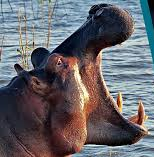

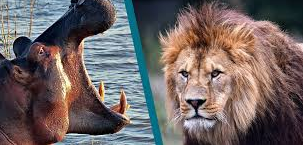

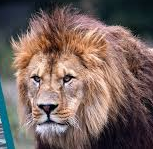

In [46]:
from IPython.display import display

for img in detect_img:
    display(img)